In [193]:
## Imports
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import seaborn as sns; sns.set()
import sklearn
import itertools

In [ ]:
## Mouting Google Drive File System in Google Colab

In [106]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [107]:
##Set path to songs
dataset_songs = './gdrive/MyDrive/genres/'

In [79]:
## Dictory for genres
genres = {'metal': 0, 'disco': 1, 'classical': 2, 'hiphop': 3, 'jazz': 4, 
          'country': 5, 'pop': 6, 'blues': 7, 'reggae': 8, 'rock': 9}

# Visulaization of Spectograms

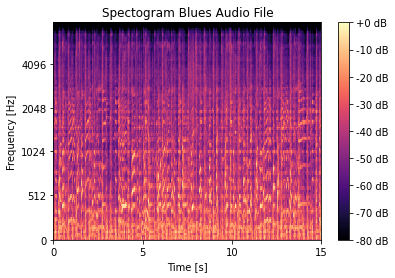

In [64]:
## See example of an spectogram of blues file
y, sr = librosa.load('./gdrive/MyDrive/genres/blues/blues.00000.wav')
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title("Spectogram Blues Audio File")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(format='%+2.0f dB')


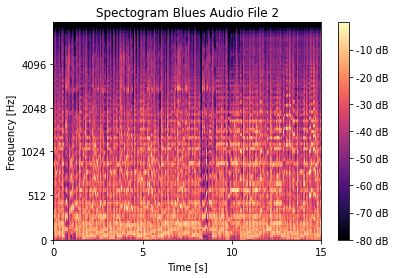

In [65]:
## See example of a different Blues Audio File
y, sr = librosa.load('./gdrive/MyDrive/genres/blues/blues.00002.wav')
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title("Spectogram Blues Audio File 2")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(format='%+2.0f dB')

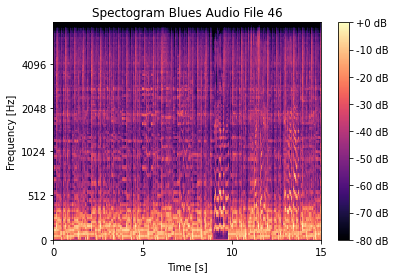

In [66]:
## See example of a different Blues Audio File
y, sr = librosa.load('./gdrive/MyDrive/genres/blues/blues.00046.wav')
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title("Spectogram Blues Audio File 46")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(format='%+2.0f dB')

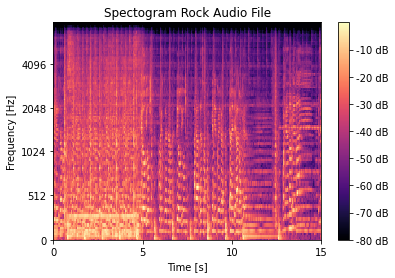

In [67]:
## See example of an spectogram of country file
y, sr = librosa.load('./gdrive/MyDrive/genres/rock/rock.00000.wav')
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title("Spectogram Rock Audio File")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(format='%+2.0f dB')

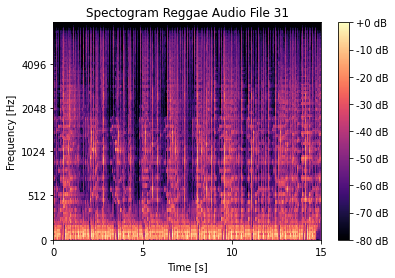

In [68]:
## See reggae sample
y, sr = librosa.load('./gdrive/MyDrive/genres/reggae/reggae.00031.wav')
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title("Spectogram Reggae Audio File 31")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(format='%+2.0f dB')

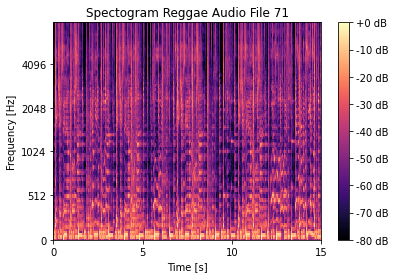

In [69]:
## See different reggae samples
y, sr = librosa.load('./gdrive/MyDrive/genres/reggae/reggae.00071.wav')
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title("Spectogram Reggae Audio File 71")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(format='%+2.0f dB')

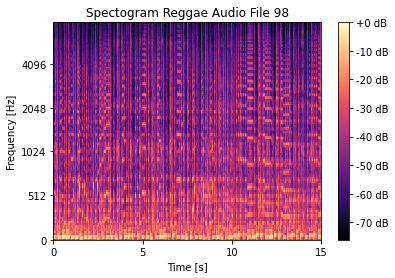

In [70]:
## See different reggae samples
y, sr = librosa.load('./gdrive/MyDrive/genres/reggae/reggae.00098.wav')
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title("Spectogram Reggae Audio File 98")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(format='%+2.0f dB')

# Spectogram Feature Extraction


In [133]:
## create function to get the features using mfcc 
def get_features(y, sr, n_fft = 2048, hop_length = 512):
    features = {'zeroCross': None, 'roloff': None, 'centroid': None, 'flux': None}

    features['zeroCross'] = librosa.feature.zero_crossing_rate(y, frame_length=n_fft, hop_length=hop_length).ravel()
    features['centroid'] = librosa.feature.spectral_centroid(y, sr=sr, n_fft=n_fft, hop_length=hop_length).ravel()
    features['roloff'] = librosa.feature.spectral_rolloff(y, sr=sr, n_fft=n_fft, hop_length=hop_length).ravel()
    features['flux'] = librosa.onset.onset_strength(y=y, sr=sr).ravel()

    chroma = librosa.feature.chroma_stft(y, sr=sr, n_fft = n_fft, hop_length = hop_length)
    for i, v_chroma in enumerate(chroma):
      features['chroma{}'.format(i)] = v_chroma.ravel()
      
    mfcc = librosa.feature.mfcc(y, sr=sr, n_fft = n_fft, hop_length = hop_length, n_mfcc=13)
    for i, v_mfcc in enumerate(mfcc):
        features['mfcc_{}'.format(i)] = v_mfcc.ravel()
        
    # Get statistics from the vectors
    def get_stats(features):
        result = {}
        for k, v in features.items():
            result['{}_max'.format(k)] = np.max(v)
            result['{}_min'.format(k)] = np.min(v)
            result['{}_mean'.format(k)] = np.mean(v)
            result['{}_std'.format(k)] = np.std(v)
        return result
    
    exp_features = get_stats(features)
    exp_features['tempo'] = librosa.beat.tempo(y, sr=sr)[0]
    
    return exp_features

In [134]:
## helper function to read files
def read_file(src_dir):  
      
    # Empty array of dicts with the processed features from all files
    arr_features = []

    # Read files from the folders
    for x,_ in genres.items():
        folder = src_dir + x
        print("Folder", folder)
        for root, subdirs, files in os.walk(folder):
            for file in files:
                # Read the audio file
                file_name = folder + "/" + file
                signal, sr = librosa.load(file_name)
                
                print("Reading file: {}".format(file_name))
                
                # Append the result to the data structure
                features = get_features(signal, sr)
                features['genre'] = genres[x]
                arr_features.append(features)
    return arr_features

In [135]:
%%time
features = read_file(dataset_songs)
print("Done Reading Files")

Folder ./gdrive/MyDrive/genres/metal
Reading file: ./gdrive/MyDrive/genres/metal/metal.00000.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00002.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00001.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00010.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00011.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00009.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00005.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00004.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00008.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00007.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00006.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00003.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00014.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00019.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00015.wav
Reading file: ./gdrive/MyDrive/genres/metal/metal.00026.wav
Rea

In [136]:
df_features = pd.DataFrame(features)
df_features.shape

(1000, 118)

In [147]:
df_features.head()

,zeroCross_max,zeroCross_min,zeroCross_mean,zeroCross_std,roloff_max,roloff_min,roloff_mean,roloff_std,centroid_max,centroid_min,centroid_mean,centroid_std,flux_max,flux_min,flux_mean,flux_std,chroma0_max,chroma0_min,chroma0_mean,chroma0_std,chroma1_max,chroma1_min,chroma1_mean,chroma1_std,chroma2_max,chroma2_min,chroma2_mean,chroma2_std,chroma3_max,chroma3_min,chroma3_mean,chroma3_std,chroma4_max,chroma4_min,chroma4_mean,chroma4_std,chroma5_max,chroma5_min,chroma5_mean,chroma5_std,...,mfcc_3_mean,mfcc_3_std,mfcc_4_max,mfcc_4_min,mfcc_4_mean,mfcc_4_std,mfcc_5_max,mfcc_5_min,mfcc_5_mean,mfcc_5_std,mfcc_6_max,mfcc_6_min,mfcc_6_mean,mfcc_6_std,mfcc_7_max,mfcc_7_min,mfcc_7_mean,mfcc_7_std,mfcc_8_max,mfcc_8_min,mfcc_8_mean,mfcc_8_std,mfcc_9_max,mfcc_9_min,mfcc_9_mean,mfcc_9_std,mfcc_10_max,mfcc_10_min,mfcc_10_mean,mfcc_10_std,mfcc_11_max,mfcc_11_min,mfcc_11_mean,mfcc_11_std,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,tempo,genre
0,0.360352,0.058594,0.183019,0.046756,9765.307617,4188.208008,6407.968161,1299.027917,5267.190253,1941.364224,3274.488271,517.869639,4.741453,0.0,1.131944,0.640262,1.0,0.042417,0.531784,0.288676,1.0,0.039874,0.531878,0.226429,1.0,0.071783,0.648864,0.272606,1.0,0.066361,0.480930,0.232969,1.0,0.033311,0.452341,0.222312,1.0,0.017413,0.451936,0.280547,...,46.322777,14.904594,42.704269,-19.419884,6.538486,10.790998,34.343132,-22.288942,10.112269,9.051044,29.712524,-21.279739,5.484860,8.166389,30.899809,-12.386814,8.849230,8.071371,25.928764,-21.394936,5.935592,7.580748,29.142677,-11.811628,6.628325,7.170275,19.720982,-24.842434,-4.032498,7.530501,31.361338,-11.952869,9.778783,7.369028,19.828756,-30.055990,-3.114062,7.303886,95.703125,0
1,0.312500,0.056641,0.128341,0.031292,7719.653320,3057.714844,4447.489090,818.236043,4233.256776,1335.103311,2198.918006,382.731927,6.812581,0.0,1.156895,0.801254,1.0,0.037212,0.370984,0.253904,1.0,0.035856,0.428514,0.284626,1.0,0.037389,0.382291,0.242826,1.0,0.034641,0.344282,0.208794,1.0,0.043602,0.459924,0.260879,1.0,0.050801,0.421409,0.230681,...,54.294205,14.687857,-4.699907,-53.967224,-24.864275,8.705251,45.761261,-7.489864,20.128448,10.320140,4.231420,-43.324608,-21.625408,8.296176,42.525669,-4.984763,20.843506,6.884142,12.073503,-31.861992,-8.390746,7.720237,41.397514,-0.068155,20.320782,6.710319,12.363684,-31.328724,-10.730496,7.186849,28.370712,-9.722876,9.661000,6.220753,6.073790,-40.081543,-14.543566,7.271003,112.347147,0
2,0.435059,0.041992,0.152841,0.041503,10185.205078,4478.906250,6037.074142,822.956493,5491.244980,2030.997090,2922.845195,428.831586,5.554421,0.0,1.104693,0.689680,1.0,0.049852,0.429266,0.221710,1.0,0.047788,0.554030,0.311368,1.0,0.033903,0.510168,0.236186,1.0,0.034130,0.575090,0.304539,1.0,0.017005,0.454341,0.233748,1.0,0.016887,0.451556,0.270085,...,46.844078,9.033002,42.176369,-18.858763,7.920761,9.615483,41.588020,-4.416197,21.766235,6.894519,25.668100,-30.064419,-2.176336,9.768414,42.835846,-1.467600,21.980255,7.464947,14.613666,-30.035370,-7.708771,7.580809,35.503532,-10.792017,11.143335,7.729743,18.417471,-25.588989,-4.284613,6.770986,34.654579,-7.274226,11.440834,6.398331,13.629011,-27.882137,-10.363935,6.636227,151.999081,0
3,0.321777,0.062988,0.196492,0.043115,7375.122070,4565.039062,5662.899348,575.296436,4407.443626,2119.579320,3048.820089,336.291049,6.812277,0.0,1.094633,0.721095,1.0,0.064758,0.542184,0.235757,1.0,0.057245,0.503992,0.253612,1.0,0.069770,0.505337,0.236852,1.0,0.055263,0.485753,0.220449,1.0,0.045140,0.492175,0.225546,1.0,0.070264,0.500988,0.219245,...,73.604416,15.006186,1.936717,-64.157005,-27.757425,12.710180,42.429008,-1.077096,23.768656,8.346566,5.484292,-38.172722,-17.904600,7.550661,47.030556,-9.959260,21.227243,9.731526,6.462314,-37.226723,-16.953653,7.751198,36.404964,-11.317825,16.132778,6.838912,0.746674,-32.268421,-15.233861,5.547429,31.553385,-1.303066,14.869462,4.887935,-2.743324,-36.522255,-18.704552,5.387887,129.199219,0
4,0.234375,0.064453,0.171440,0.028532,6718.359375,3951.342773,5157.401993,402.289205


# Dimensionality Reduction

In [165]:
## Feature Matrix
X = df_features.drop(['genre'], axis=1).values
## Target Matrix
y = df_features['genre']. values

In [155]:
#Standarize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
scaled_data = scaler.fit_transform(X)

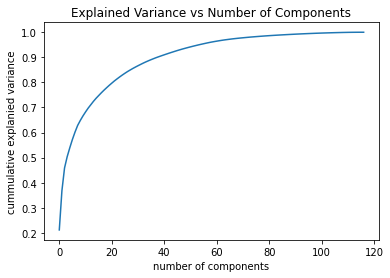

In [156]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance vs Number of Components");
plt.xlabel("number of components");
plt.ylabel("cummulative explanied variance");

In [168]:
## With less than 20 components we still retaain most of the variance
pca = PCA(n_components=60);
x_pca = pca.fit_transform(scaled_data)
print("cummulative explained variance ratio = {:.4f}".format(np.sum(pca.explained_variance_ratio_)))

cummulative explained variance ratio = 0.9626


Text(0, 0.5, 'PCA 4')

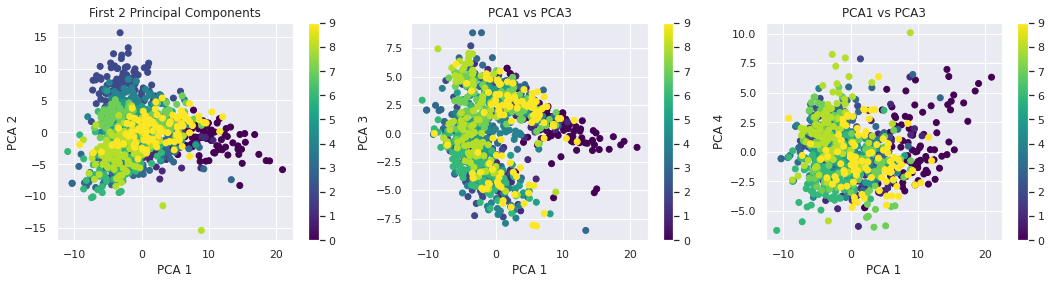

In [180]:
plt.figure(figsize=(18,4))
plt.subplot(131)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='viridis')
plt.colorbar()
plt.title("First 2 Principal Components")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.subplot(132)
plt.scatter(x_pca[:,0], x_pca[:,2], c=y, cmap='viridis')
plt.colorbar()
plt.title("PCA1 vs PCA3")
plt.xlabel("PCA 1")
plt.ylabel("PCA 3")

plt.subplot(133)
plt.scatter(x_pca[:,0], x_pca[:,3], c=y, cmap='viridis')
plt.colorbar()
plt.title("PCA1 vs PCA3")
plt.xlabel("PCA 1")
plt.ylabel("PCA 4")


# Model Using Random Forest

In [217]:
# Helper to plot confusion matrix -- from Scikit-learn website
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid();
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



In [236]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
classes = ['metal', 'disco', 'classical', 'hiphop', 'jazz', 'country', 'pop','blues', 'reggae','rock' ]
Xtrain, Xtest, ytrain, ytest = train_test_split(x_pca,y,random_state=15, shuffle=True)
model = RandomForestClassifier(n_estimators=1000, criterion="entropy")
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [237]:
from sklearn import metrics
print(metrics.classification_report(ypred,ytest, target_names=classes))

              precision    recall  f1-score   support

       metal       0.86      0.69      0.77        26
       disco       0.62      0.56      0.59        27
   classical       1.00      1.00      1.00        23
      hiphop       0.62      0.73      0.67        22
        jazz       0.96      0.85      0.90        27
     country       0.62      0.69      0.65        26
         pop       0.83      0.63      0.72        30
       blues       0.64      0.76      0.70        21
      reggae       0.77      0.86      0.81        28
        rock       0.46      0.55      0.50        20

    accuracy                           0.73       250
   macro avg       0.74      0.73      0.73       250
weighted avg       0.75      0.73      0.73       250



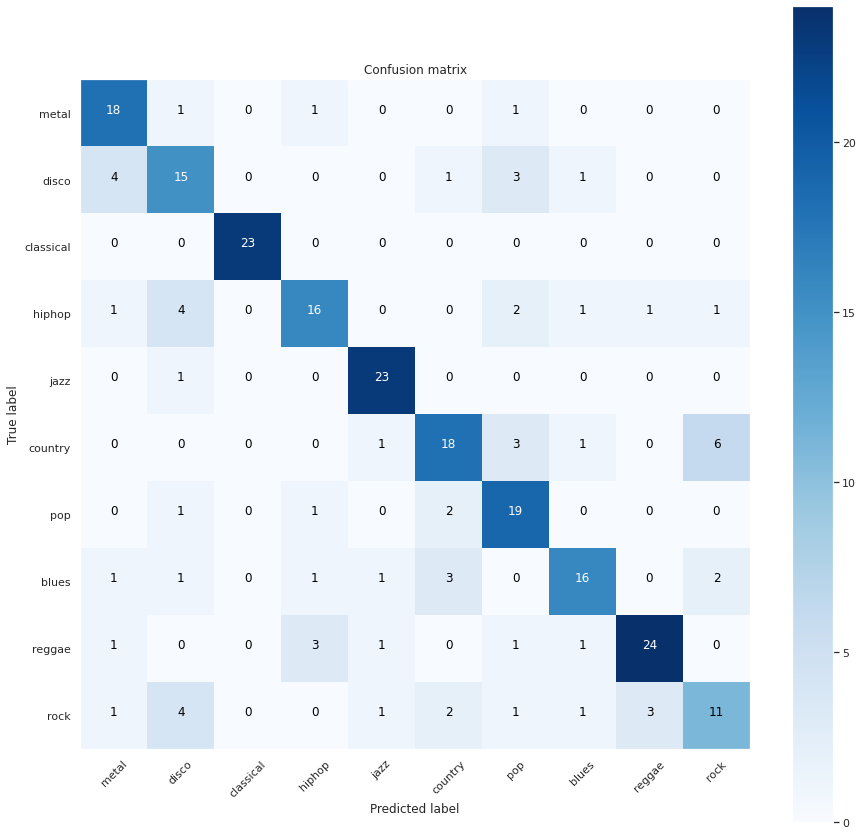

In [238]:
mat = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(15,15))
plot_confusion_matrix(mat,classes, normalize=False);